In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('MergedViolenceDataTB.csv')
print(data.head())

   sujeto genero  edad edo_civil  carrera  semestre  discapacidad  lengua  \
0    2703      F    22   SOLTERO        1         8             1       1   
1    2703      F    22   SOLTERO        1         8             1       1   
2    2733      M    21   SOLTERO       13         8             1       1   
3    2733      M    21   SOLTERO       13         8             1       1   
4    2736      M    21   SOLTERO       13         8             1       1   

   esc_proc  prom  ant_aca  gusto  familia  tipo_f  vivienda     cuenta  \
0         6   8.5     2323    1.0      1.0     3.0       1.0  202001044   
1         6   8.5     2323    1.0      1.0     3.0       1.0  202001044   
2         1   8.8      974    1.0      1.0     2.0       1.0  202035031   
3         1   8.8      974    1.0      1.0     2.0       1.0  202035031   
4         1   7.9     1100    1.0      1.0     2.0       1.0  202035033   

     tipo  frecuencia  
0  Sexual         1.0  
1  Sexual         1.0  
2  Física     

In [ ]:
print(data.info())
print(data.describe())  # Esto te dará estadísticas básicas para las características numéricas
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sujeto        249 non-null    int64  
 1   genero        249 non-null    object 
 2   edad          249 non-null    int64  
 3   edo_civil     249 non-null    object 
 4   carrera       249 non-null    int64  
 5   semestre      249 non-null    int64  
 6   discapacidad  249 non-null    int64  
 7   lengua        249 non-null    int64  
 8   esc_proc      249 non-null    int64  
 9   prom          249 non-null    float64
 10  ant_aca       249 non-null    int64  
 11  gusto         249 non-null    float64
 12  familia       249 non-null    float64
 13  tipo_f        249 non-null    float64
 14  vivienda      249 non-null    float64
 15  cuenta        249 non-null    int64  
 16  tipo          249 non-null    object 
 17  frecuencia    249 non-null    float64
dtypes: float64(6), int64(9), objec

In [ ]:
# Codificación de variables categóricas
encoder = LabelEncoder()
data['genero'] = encoder.fit_transform(data['genero'])
data['edo_civil'] = encoder.fit_transform(data['edo_civil'])
data['tipo'] = encoder.fit_transform(data['tipo'])

# División de los datos
X = data.drop(['tipo', 'sujeto', 'cuenta'], axis=1)  # Eliminando columnas no necesarias
y = data['tipo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación y entrenamiento del modelo Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Evaluación del modelo
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 1  0  0  0  1  0  3]
 [ 0  1  0  0  0  0  0]
 [10  0  4  0  0  0  3]
 [ 0  0  0  0  0  0  0]
 [13  0  2  1  6  0  2]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  2]]
              precision    recall  f1-score   support

           0       0.04      0.20      0.07         5
           2       1.00      1.00      1.00         1
           3       0.67      0.24      0.35        17
           4       0.00      0.00      0.00         0
           5       0.86      0.25      0.39        24
           6       1.00      1.00      1.00         1
           9       0.20      1.00      0.33         2

    accuracy                           0.30        50
   macro avg       0.54      0.53      0.45        50
weighted avg       0.69      0.30      0.36        50



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Asumiendo que 'y_train' es tu vector de etiquetas de entrenamiento
class_counts = y_train.value_counts()
print(class_counts)


tipo
5     76
3     46
6     18
0     17
9     10
1      8
10     7
7      6
4      5
8      4
2      2
Name: count, dtype: int64


In [ ]:
# Encuentra el número mínimo de ejemplos en cualquier clase
min_samples = class_counts.min()

# Asegúrate de que k_neighbors sea al menos 1 y no mayor que min_samples - 1
k_neighbors = max(min_samples - 1, 1)

# Configura SMOTE con el k_neighbors ajustado
smote = SMOTE(k_neighbors=k_neighbors)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verifica la nueva distribución de clases para asegurarte de que el balanceo fue exitoso
print(pd.Series(y_train_smote).value_counts())


tipo
5     76
2     76
3     76
1     76
7     76
6     76
9     76
4     76
0     76
10    76
8     76
Name: count, dtype: int64


In [ ]:
# Encuentra el número mínimo de ejemplos en cualquier clase
min_samples = class_counts.min()

# Asegúrate de que k_neighbors sea al menos 1 y no mayor que min_samples - 1
k_neighbors = max(min_samples - 1, 1)

# Configura SMOTE con el k_neighbors ajustado
smote = SMOTE(k_neighbors=k_neighbors)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verifica la nueva distribución de clases para asegurarte de que el balanceo fue exitoso
print(pd.Series(y_train_smote).value_counts())


tipo
5     76
2     76
3     76
1     76
7     76
6     76
9     76
4     76
0     76
10    76
8     76
Name: count, dtype: int64


In [ ]:
# Reentrenar el modelo Naive Bayes
model = GaussianNB()
model.fit(X_train_smote, y_train_smote)  # Asumiendo que X_train_smote y y_train_smote son tus datos balanceados
y_pred = model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 1  0  0  0  1  0  3]
 [ 0  1  0  0  0  0  0]
 [10  0  4  0  0  0  3]
 [ 0  0  0  0  0  0  0]
 [10  0  6  1  5  0  2]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  2]]
              precision    recall  f1-score   support

           0       0.05      0.20      0.08         5
           2       1.00      1.00      1.00         1
           3       0.40      0.24      0.30        17
           4       0.00      0.00      0.00         0
           5       0.83      0.21      0.33        24
           6       1.00      1.00      1.00         1
           9       0.20      1.00      0.33         2

    accuracy                           0.28        50
   macro avg       0.50      0.52      0.43        50
weighted avg       0.59      0.28      0.32        50



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import GridSearchCV

# Configurar el espacio de parámetros para Naive Bayes (por ejemplo, ajustar 'var_smoothing')
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=5)
grid.fit(X_train_smote, y_train_smote)

print("Mejor parámetro:", grid.best_params_)
print("Mejor precisión:", grid.best_score_)

Mejor parámetro: {'var_smoothing': 1.873817422860383e-07}
Mejor precisión: 0.8337610493299117


In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluar el modelo usando validación cruzada
scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5)
print("Precisión media de validación cruzada:", scores.mean())

Precisión media de validación cruzada: 0.7643926432848589


              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           2       1.00      1.00      1.00         1
           3       0.42      0.47      0.44        17
           4       0.00      0.00      0.00         0
           5       0.62      0.42      0.50        24
           6       1.00      1.00      1.00         1
           9       0.25      1.00      0.40         2

    accuracy                           0.48        50
   macro avg       0.57      0.61      0.55        50
weighted avg       0.56      0.48      0.50        50

[[ 2  0  1  0  1  0  1]
 [ 0  1  0  0  0  0  0]
 [ 1  0  8  0  5  0  3]
 [ 0  0  0  0  0  0  0]
 [ 0  0 10  2 10  0  2]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  2]]
              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           2       1.00      1.00      1.00         1
           3       0.42      0.47      0.44        17
           4     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

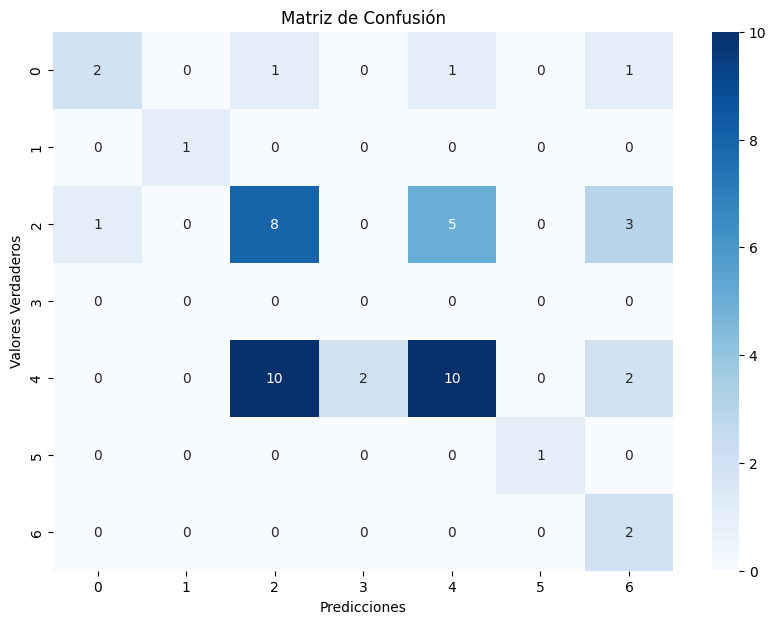

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Configurar el modelo con el mejor parámetro de var_smoothing encontrado
model = GaussianNB(var_smoothing=1.232846739442066e-07)
model.fit(X_train, y_train)  # Asumiendo que X_train y y_train ya están definidos y preparados

# Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
from sklearn.naive_bayes import GaussianNB

# Configurar el modelo con el mejor parámetro de var_smoothing encontrado
model = GaussianNB(var_smoothing=1.232846739442066e-07)
model.fit(X_train, y_train)  # Asumiendo que X_train y y_train ya están definidos y preparados

# Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))  # Establecer el tamaño de la figura
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')  # 'g' para formato numérico entero
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.savefig('matriz_violenceTB.png')
plt.show()


In [ ]:
y_prob = model.predict_proba(X_test)  # Probabilidades de cada clase
from sklearn.preprocessing import label_binarize
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)

In [ ]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score

# Variables para agregar la media y la curva ROC total
fpr = dict()
tpr = dict()
roc_auc = dict()
all_fpr = np.linspace(0, 1, 100)

# Calcular dummies una vez
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro-average ROC curve y ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


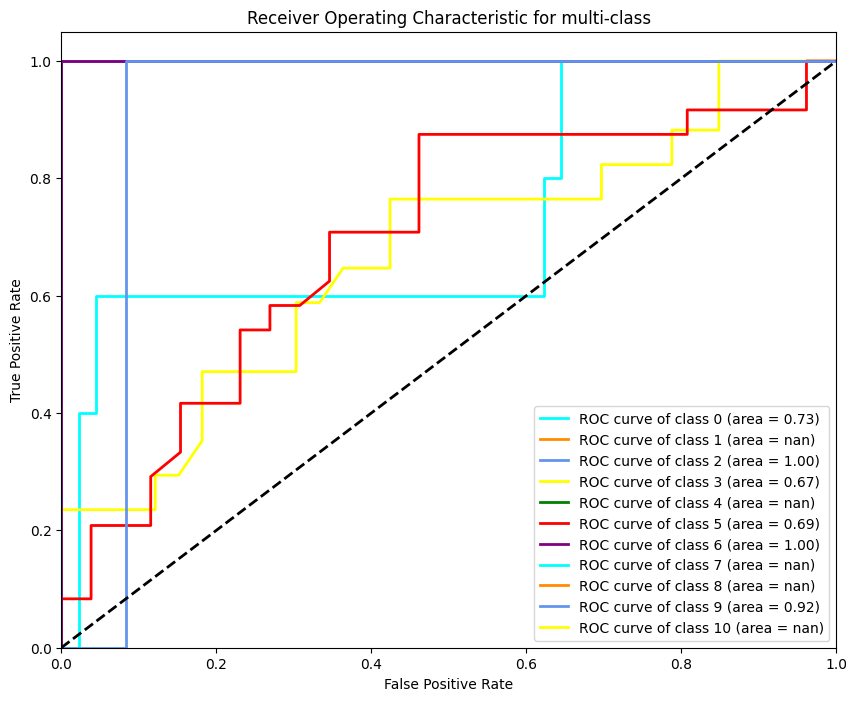

In [ ]:
import matplotlib.pyplot as plt
from itertools import cycle

# Plot all ROC curves
plt.figure(figsize=(10, 8))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'yellow', 'green', 'red', 'purple'])
for i, color in zip(range(len(classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for multi-class')
plt.legend(loc="lower right")
plt.savefig('ROC_CurveTB.png')
plt.show()
